<a href="https://colab.research.google.com/github/ManuelRix-11/FlowerRecognition/blob/main/ProgettoFia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import delle Librerie 📓

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import shutil

## Percorsi delle cartelle e creazione dei sotto set 📁

In [4]:
base_dir = 'working\Images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

def split_data(base_dir, working_dir, train_ratio=0.7, val_ratio=0.2):
    for folder in ['train', 'val', 'test']:
        folder_path = os.path.join(working_dir, folder)
        if os.path.exists(folder_path):
            shutil.rmtree(folder_path)
        os.makedirs(folder_path)

    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            np.random.shuffle(images)

            train_split = int(len(images) * train_ratio)
            val_split = int(len(images) * (train_ratio + val_ratio))

            train_images = images[:train_split]
            val_images = images[train_split:val_split]
            test_images = images[val_split:]

            for image_set, folder in zip([train_images, val_images, test_images], ['train', 'val', 'test']):
                target_dir = os.path.join(working_dir, folder, category)
                os.makedirs(target_dir, exist_ok=True)
                for image in image_set:
                    shutil.copy(os.path.join(category_path, image), os.path.join(target_dir, image))

base_dir = 'FlowerRecognition/flowers'
working_dir = 'working\Images'

split_data(base_dir, working_dir)

## Generatori di immagini 🖼



In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3327 images belonging to 5 classes.
Found 862 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


## Costruzione del Modello 🏗

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-04 17:12:36.675564: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-04 17:12:37.521339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Document

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

## Addestramento 🏃🏻‍♂️

In [7]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730740360.563004    2928 service.cc:145] XLA service 0x7f17a8001340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730740360.563247    2928 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-11-04 17:12:40.683313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 17:12:41.125513: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


  4/104 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1654 - loss: 4.1539 

I0000 00:00:1730740373.534554    2928 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 36s 199ms/step - accuracy: 0.2605 - loss: 1.9785 - val_accuracy: 0.2436 - val_loss: 1.5864
Epoch 2/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.3777 - loss: 1.4476 - val_accuracy: 0.4049 - val_loss: 1.3434
Epoch 3/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.4933 - loss: 1.2246 - val_accuracy: 0.4524 - val_loss: 1.2300
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5312 - loss: 1.1132 - val_accuracy: 0.5104 - val_loss: 1.1412
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5666 - loss: 1.0486 - val_accuracy: 0.4919 - val_loss: 1.1766
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6125 - loss: 0.9724 - val_accuracy: 0.4884 - val_loss: 1.2062
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6429 - loss: 0.9259 - val_accuracy: 0.5302 - val_loss: 1.1030
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6392 - loss: 0.9497 - val_accuracy: 0.

## Valutazione ✅

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7035 - loss: 0.8373
Test accuracy: 0.6965517401695251


## Grafico delle Prestazioni

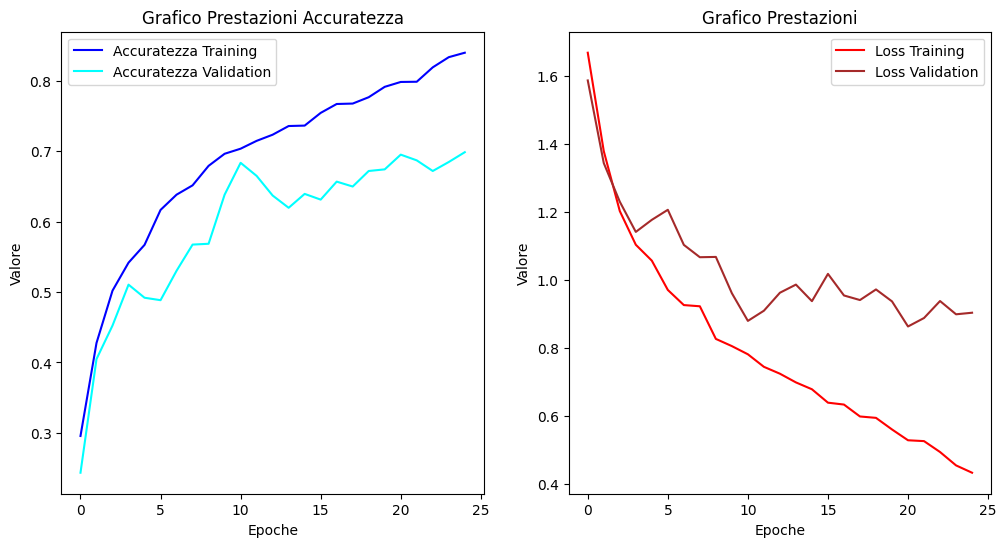

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuratezza Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Accuratezza Validation', color='cyan')
plt.xlabel('Epoche')
plt.ylabel('Valore')
plt.title('Grafico Prestazioni Accuratezza')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training', color='red')
plt.plot(history.history['val_loss'], label='Loss Validation', color='brown')
plt.xlabel('Epoche')
plt.ylabel('Valore')
plt.title('Grafico Prestazioni')
plt.legend()

plt.show()

## Predizione

In [9]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


## Output delle predizioni

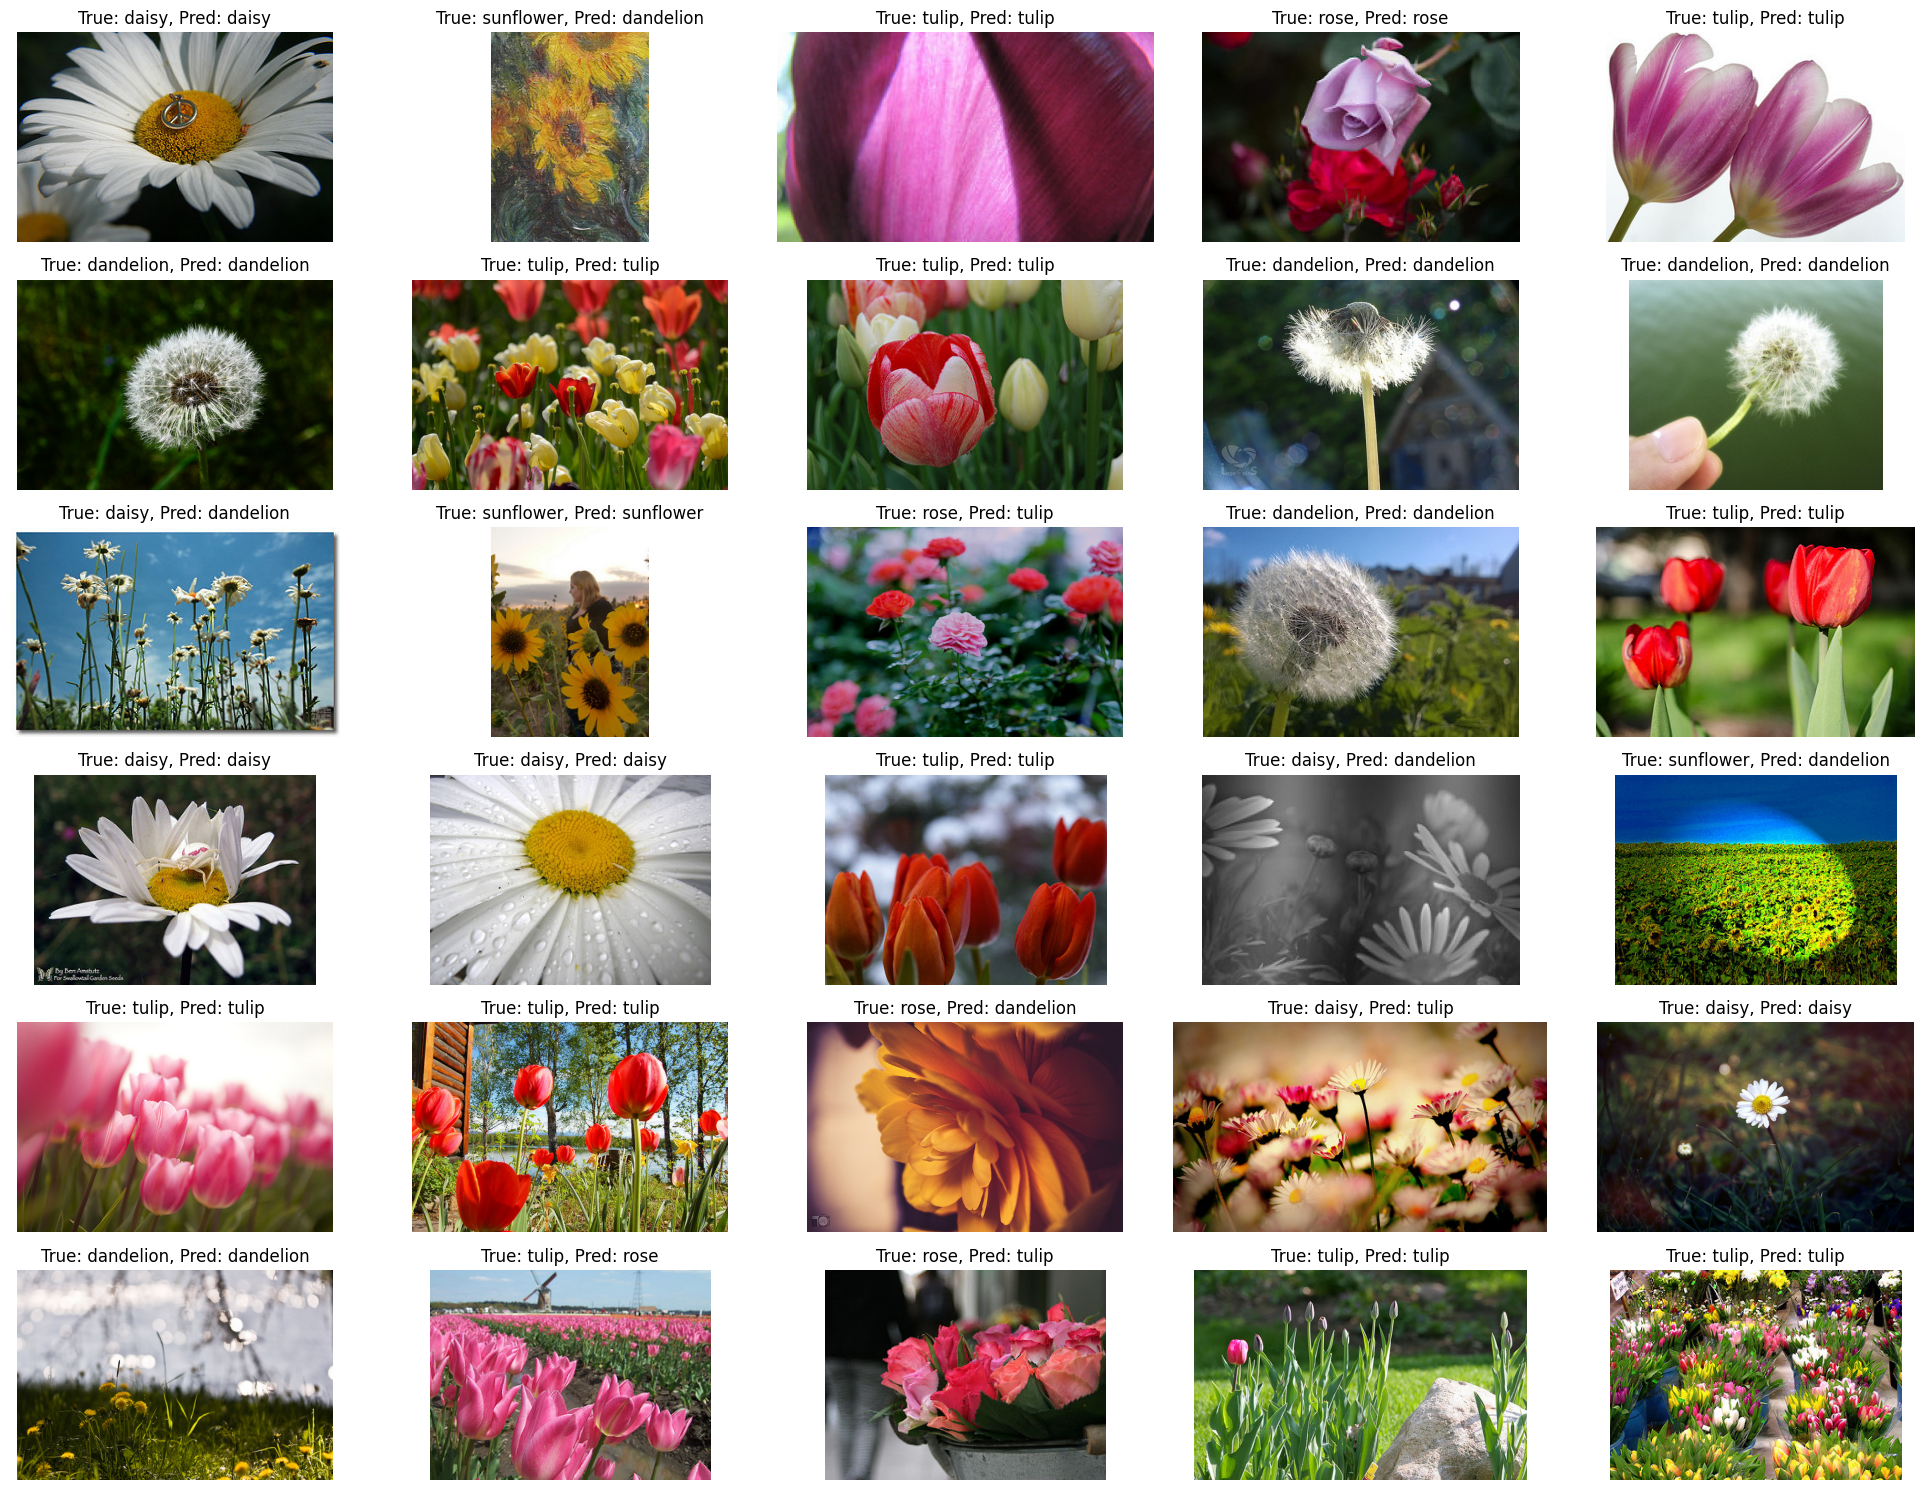

In [10]:
def display_predictions(generator, predictions, true_classes, class_indices, num_samples=30):
    class_labels = list(class_indices.keys())
    indices = np.arange(len(predictions))
    np.random.shuffle(indices)
    sampled_indices = indices[:num_samples]

    plt.figure(figsize=(20, 15))
    for i, idx in enumerate(sampled_indices):
        img_path = generator.filepaths[idx]
        img = Image.open(img_path)
        true_label = class_labels[true_classes[idx]]
        pred_label = class_labels[predictions[idx]]

        plt.subplot(6, 5, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions(test_generator, y_pred, test_generator.classes, test_generator.class_indices)

## Classification Report

In [11]:
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       daisy       0.90      0.60      0.72        77
   dandelion       0.63      1.00      0.78       106
        rose       0.62      0.30      0.41        79
   sunflower       0.92      0.73      0.81        74
       tulip       0.61      0.74      0.67        99

    accuracy                           0.70       435
   macro avg       0.74      0.67      0.68       435
weighted avg       0.72      0.70      0.68       435



## Matrice di confusione

Confusion Matrix


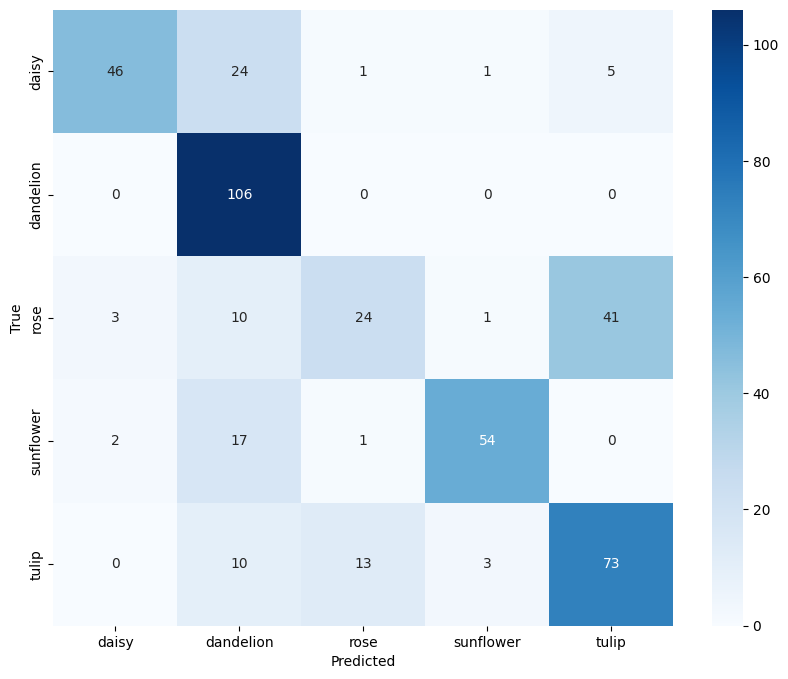

In [12]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()